In [48]:
words = open('names.txt', 'r').read().splitlines()

In [49]:
print(words)

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

In [50]:
import torch

In [51]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))


        

In [52]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [53]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [54]:
print(N)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [55]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

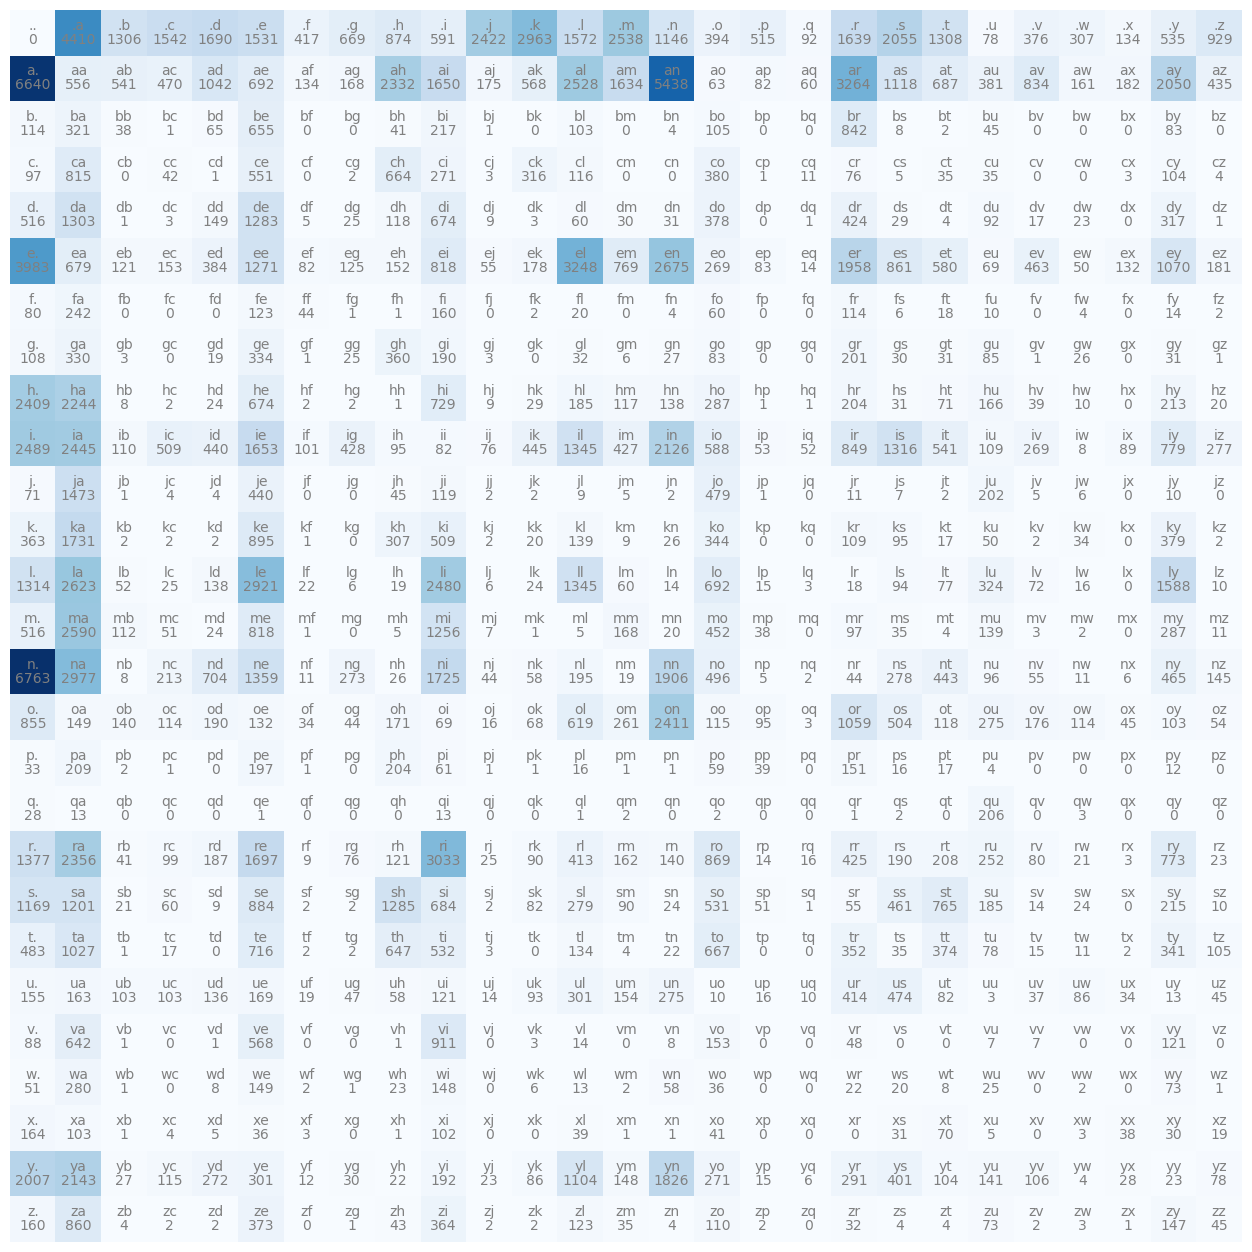

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [57]:
type(N[3,3])

torch.Tensor

In [60]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [82]:
p = N[0].float()

In [83]:
p = p/p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [112]:
P.sum(1, keepdim = True).shape

torch.Size([27, 1])

In [105]:
P.shape

torch.Size([27, 27])

In [125]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [126]:
p[0].shape

torch.Size([])

In [127]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'.'

In [128]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
p = p/p.sum()

p

tensor([0.6064, 0.3033, 0.0903])

In [129]:
torch.multinomial(p, num_samples = 100, replacement = True, generator = g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [130]:

g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0

    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(27)/ 27.0
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [131]:
#Until now we have trained a bigram language model....Now we will summarize the quality of this model

In [135]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob: 4f} {logprob: 4f}")

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")

.a:  0.137586 -1.983508
an:  0.160386 -1.830174
nd:  0.038411 -3.259405
dr:  0.076951 -2.564587
re:  0.133417 -2.014275
ej:  0.002738 -5.900386
jq:  0.000342 -7.981733
q.:  0.096990 -2.333148
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [136]:
###Now we will be looking at the neural network approach of this problem

In [148]:
#Create a training set of bigrams
xs, ys = [], []
for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

    

. e
e m
m m
m a
a .


In [149]:
list(w)

['e', 'm', 'm', 'a']

In [150]:
chs

['.', 'e', 'm', 'm', 'a', '.']

In [160]:
xs

tensor([ 0,  5, 13, 13,  1])

In [155]:
ys

tensor([ 5, 13, 13,  1,  0])

In [164]:
import torch.nn.functional as f
xenc = f.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

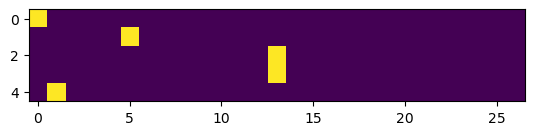

In [161]:
plt.imshow(xenc)

In [165]:
xenc.dtype

torch.float32

In [193]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad=True)
logits = xenc@W

In [169]:
#(5, 27) @ (27, 27) -> (5, 27)

In [184]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims= True)
prob

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [178]:
prob.shape

torch.Size([5, 27])

In [185]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [191]:
loss = -prob[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

In [210]:
#forward pass
xenc = f.one_hot(xs, num_classes=27).float()
logits = xenc@W
counts = logits.exp()
prob = counts / counts.sum(1, keepdims= True)
loss = -prob[torch.arange(5), ys].log().mean()


In [211]:
#backward pass
W.grad = None# set to zero gradient
loss.backward()

In [212]:
W.data += -0.1 *W.grad

In [213]:
print(loss.item())

3.6891887187957764


In [216]:
xs, ys = [], []
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
       
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ',num)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad=True)


number of examples:  228146


In [228]:
#Putting everything together
for k in range(100):
    #forward pass
    xenc = f.one_hot(xs, num_classes=27).float()
    logits = xenc@W
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdims= True)
    loss = -prob[torch.arange(num), ys].log().mean()
    print(loss.item())

    #Backward pass
    W.grad = None# set to zero gradient
    loss.backward()

    #update
    W.data += -50 * W.grad


    


2.470571517944336
2.470396041870117
2.470224142074585
2.470055341720581
2.4698898792266846
2.4697279930114746
2.4695687294006348
2.4694125652313232
2.469259738922119
2.469109058380127
2.468961715698242
2.4688174724578857
2.468675136566162
2.4685356616973877
2.4683985710144043
2.46826434135437
2.4681317806243896
2.4680018424987793
2.467874526977539
2.4677488803863525
2.467625617980957
2.4675042629241943
2.4673855304718018
2.467268466949463
2.467153787612915
2.4670403003692627
2.4669289588928223
2.4668192863464355
2.4667115211486816
2.4666059017181396
2.466501474380493
2.4663987159729004
2.4662978649139404
2.466198444366455
2.4661004543304443
2.4660041332244873
2.465909481048584
2.465815782546997
2.465723991394043
2.465632915496826
2.4655439853668213
2.4654557704925537
2.46536922454834
2.4652836322784424
2.4651997089385986
2.4651167392730713
2.4650349617004395
2.464954376220703
2.464874744415283
2.464796304702759
2.464719295501709
2.4646430015563965
2.4645678997039795
2.464494228363037
2